In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar el archivo JSON forzando 'user_id' a ser de tipo str
file_path = 'review_Florida.json'
df_florida = pd.read_json(file_path, dtype={'user_id': str})

In [3]:
# Vista inicial de datos
df_florida.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,101471856155148729010,Julie A. Gerber,1628003250740,1,Update: Their “reply” to my review amounted to...,None,"{'time': 1627042799532, 'text': 'Thank you for...",0x8893863ea87bd5dd:0x9383ebf973e74abb
1,115477234789038326051,Martin Sheffield,1595031217005,5,He's a knowledgeable doctor but the way he run...,None,"{'time': 1582464056733, 'text': 'Thank you for...",0x8893863ea87bd5dd:0x9383ebf973e74abb
2,101805010244892834381,Brian Truett,1522924253567,5,"Best doctor I've ever had, I never wait to be ...",None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
3,106344422881493743981,Tina Sun,1467907819586,1,I was told he is a good doctor. I was trying t...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
4,100875113069561776529,James Haynes,1480683415081,5,Takes the time to actually get to know his pat...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb


In [4]:
df_florida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850000 entries, 0 to 2849999
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 174.0+ MB


In [5]:
# Conteo de reseñas totales
total_reviews_florida = df_florida.shape[0]
print(f"Total de reseñas en Florida: {total_reviews_florida}")

Total de reseñas en Florida: 2850000


In [6]:
# Valores faltantes
nulos_florida = df_florida.isnull().sum()
nulos_florida

user_id          0
name             0
time             0
rating           0
text       1079510
pics       2745810
resp       2394601
gmap_id          0
dtype: int64

In [7]:
# veremos que columna contiene una lista
for column in df_florida.columns:
    if df_florida[column].apply(lambda x: isinstance(x, list)).any():
        print(f"Columna '{column}' contiene listas")

Columna 'pics' contiene listas


In [8]:
# veremos que columna contiene un diccionario
for column in df_florida.columns:
    if df_florida[column].apply(lambda x: isinstance(x, dict)).any():
        print(f"Columna '{column}' contiene diccionarios")

Columna 'resp' contiene diccionarios


In [9]:
# Definir las columnas a considerar para la duplicación
columns_to_check = df_florida.columns.difference(['pics', 'resp'])

# Encontrar filas duplicadas considerando solo las columnas especificadas
duplicated_rows = df_florida.duplicated(subset=columns_to_check)

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()

print(
    f"Número de filas duplicadas (sin contar 'pics' y 'resp'): {num_duplicated_rows}")

Número de filas duplicadas (sin contar 'pics' y 'resp'): 119396


In [10]:
# Calcular el porcentaje de datos utilizables
percent_data_usable_florida = (
    df_florida.notnull().sum() / total_reviews_florida) * 100

# Redondear a 2 decimales
percent_data_usable_florida = percent_data_usable_florida.round(2)

# Formatear y mostrar los resultados
print('Porcentaje de datos utilizables en Florida:')
for column, value in percent_data_usable_florida.items():
    print(f'{column}: {value:.2f}%')

Porcentaje de datos utilizables en Florida:
user_id: 100.00%
name: 100.00%
time: 100.00%
rating: 100.00%
text: 62.12%
pics: 3.66%
resp: 15.98%
gmap_id: 100.00%


Frecuencia de cada valor de rating en Florida:
1     192856
2      88493
3     221512
4     476149
5    1870990
Name: rating, dtype: int64


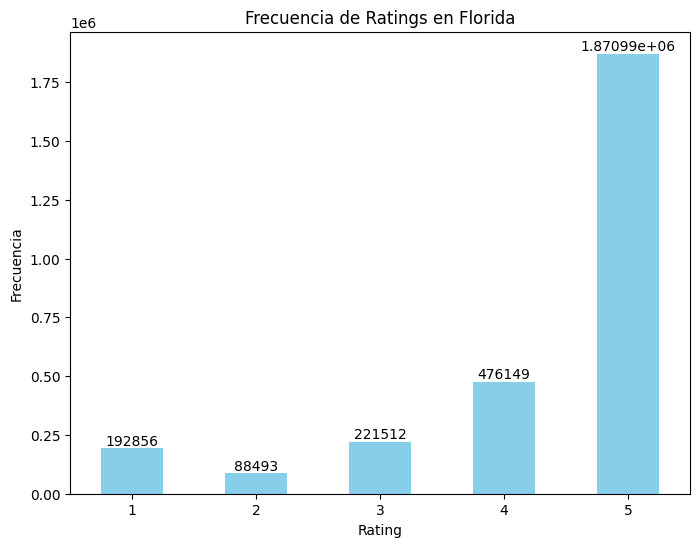

In [11]:
# Calcular la frecuencia de cada valor de rating
frecuencia_rating_florida = df_florida['rating'].value_counts().sort_index()

# Mostrar la frecuencia de ratings
print("Frecuencia de cada valor de rating en Florida:")
print(frecuencia_rating_florida)

plt.figure(figsize=(8, 6))
frecuencia_rating_florida.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Ratings en Florida')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
# Mostrar los números totales dentro de las barras
plt.bar_label(plt.gca().containers[0], label_type='edge', fontsize=10)
plt.show()

In [12]:
# Contar la frecuencia de cada valoración (rating) en el DataFrame
rating_counts = df_florida['rating'].value_counts().sort_index()

# Calcular el porcentaje de cada valoración y redondear a 2 decimales
rating_percentages = ((rating_counts / rating_counts.sum()) * 100).round(2)

# Mostrar los resultados
print("Porcentaje de cada valoración (rating) en Florida:")
print(rating_percentages)

Porcentaje de cada valoración (rating) en Florida:
1     6.77
2     3.11
3     7.77
4    16.71
5    65.65
Name: rating, dtype: float64


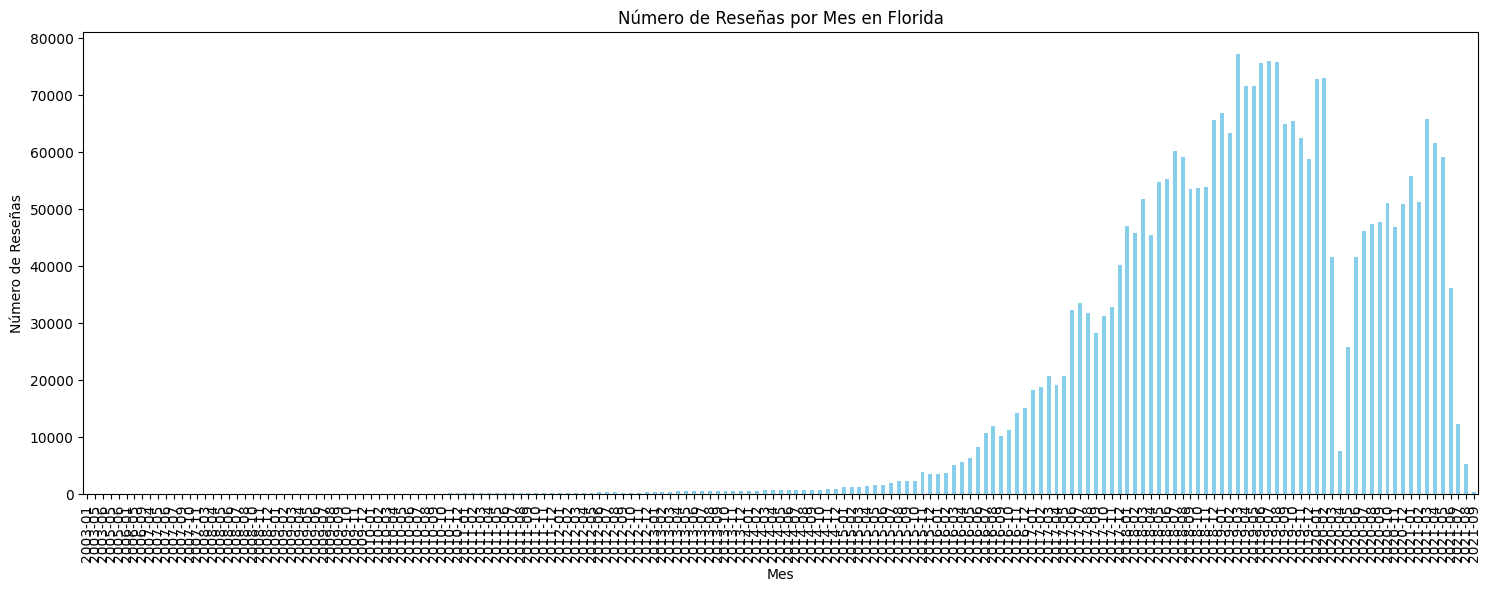

In [13]:
# Convertir la columna 'time' a formato datetime
df_florida['time'] = pd.to_datetime(df_florida['time'], unit='ms')

# Extraer el mes y el año de la columna de tiempo
df_florida['month'] = df_florida['time'].dt.to_period('M')

# Calcular la cantidad de reseñas por mes
cantidad_reseñas_mes_florida = df_florida['month'].value_counts().sort_index()

# Visualizar la distribución de reseñas por mes
plt.figure(figsize=(18, 6))
cantidad_reseñas_mes_florida.plot(kind='bar', color='skyblue')
plt.title('Número de Reseñas por Mes en Florida')
plt.xlabel('Mes')
plt.ylabel('Número de Reseñas')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Mostrar la cantidad de reseñas por mes
print("Cantidad de reseñas por mes en Florida:")
cantidad_reseñas_mes_florida

Cantidad de reseñas por mes en Florida:


2003-01        1
2003-05        8
2003-06        3
2005-05        8
2005-06        3
           ...  
2021-05    59074
2021-06    36170
2021-07    12285
2021-08     5176
2021-09      275
Freq: M, Name: month, Length: 177, dtype: int64

In [15]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descargar el lexicon de VADER
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimientos de VADER
sia = SentimentIntensityAnalyzer()

# Filtrar las reseñas no nulas
df_florida_filtered = df_florida[df_florida['text'].notnull()]

# Calcular el puntaje de sentimiento para cada reseña
df_florida_filtered['sentiment_score'] = df_florida_filtered['text'].apply(
    lambda x: sia.polarity_scores(x)['compound'])

# Clasificar las reseñas como positivas o negativas
df_florida_filtered['sentiment_label'] = df_florida_filtered['sentiment_score'].apply(
    lambda x: 'Positiva' if x > 0 else ('Negativa' if x < 0 else 'Neutral'))

# Filtrar solo las reseñas positivas y negativas
df_florida_filtered = df_florida_filtered[df_florida_filtered['sentiment_label'] != 'Neutral']

# Contar el número de reseñas positivas y negativas
positive_reviews = df_florida_filtered[df_florida_filtered['sentiment_label']
                                       == 'Positiva'].shape[0]
negative_reviews = df_florida_filtered[df_florida_filtered['sentiment_label']
                                       == 'Negativa'].shape[0]
total_reviews = positive_reviews + negative_reviews

# Calcular los porcentajes de reseñas positivas y negativas
positive_percentage = round((positive_reviews / total_reviews) * 100, 2)
negative_percentage = round((negative_reviews / total_reviews) * 100, 2)

print(f"Porcentaje de Reseñas Positivas: {positive_percentage}%")
print(f"Porcentaje de Reseñas Negativas: {negative_percentage}%")
print(
    f"Suma total de los porcentajes (positivas + negativas): {positive_percentage + negative_percentage}%")

[nltk_data] Downloading package vader_lexicon to C:\Users\Lenovo
[nltk_data]     ThinkPad T440\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Porcentaje de Reseñas Positivas: 88.8%
Porcentaje de Reseñas Negativas: 11.2%
Suma total de los porcentajes (positivas + negativas): 100.0%


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Filtrar las reseñas no nulas
df_florida_filtered = df_florida[df_florida['text'].notnull()]

# Inicializar CountVectorizer para convertir texto en matriz de conteo de palabras
# Eliminar palabras comunes del inglés
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform(df_florida_filtered['text'])

# Sumar la cantidad de cada palabra
word_counts_sum = word_counts.sum(axis=0)

# Crear un DataFrame con las palabras y sus frecuencias
word_freq = [(word, word_counts_sum[0, idx])
             for word, idx in vectorizer.vocabulary_.items()]
word_freq_df = pd.DataFrame(word_freq, columns=['Palabra', 'Frecuencia'])

# Ordenar por frecuencia en orden descendente
word_freq_df = word_freq_df.sort_values(by='Frecuencia', ascending=False)

# Mostrar las 10 palabras más frecuentes
print(word_freq_df.head(10))

      Palabra  Frecuencia
186     great      523390
167      good      362308
188   service      334058
691      food      331926
42      place      292441
55      staff      187407
8        time      170345
182      nice      161632
185  friendly      156601
158      best      152561


In [17]:
# Calcular el porcentaje total de datos utilizables
total_percent_usable = percent_data_usable_florida.mean()

# Redondear a 2 decimales y mostrar el resultado
total_percent_usable = round(total_percent_usable, 2)
print(
    f'Porcentaje total de datos utilizables en Florida: {total_percent_usable:.2f}%')

Porcentaje total de datos utilizables en Florida: 72.72%


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

# Filtrar las reseñas no nulas
df_florida_filtered = df_florida[df_florida['text'].notnull()]

# Inicializar CountVectorizer para convertir texto en una matriz de conteo de palabras
# Eliminar palabras comunes del inglés
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform(df_florida_filtered['text'])

# Calcular la matriz de co-ocurrencia dispersa
co_occurrence_matrix_sparse = word_counts.T.dot(word_counts)

# Convertir la matriz dispersa a formato COO (Coordinate list) para facilitar la manipulación
coo = coo_matrix(co_occurrence_matrix_sparse)

# Crear un DataFrame a partir de la matriz COO para manipulación más fácil
co_occurrence_df = pd.DataFrame(
    {'word1': coo.row, 'word2': coo.col, 'co_occurrence': coo.data})

# Mapear los índices de palabras a sus términos reales
terms = vectorizer.get_feature_names_out()
co_occurrence_df['word1'] = co_occurrence_df['word1'].map(lambda x: terms[x])
co_occurrence_df['word2'] = co_occurrence_df['word2'].map(lambda x: terms[x])

# Filtrar solo las combinaciones donde la primera palabra es menor que la segunda (para evitar duplicados inversos)
co_occurrence_df = co_occurrence_df[co_occurrence_df['word1']
                                    < co_occurrence_df['word2']]

# Ordenar por la frecuencia de co-ocurrencia en orden descendente
top_combinations = co_occurrence_df.sort_values(
    by='co_occurrence', ascending=False).head(5)

# Imprimir las 5 combinaciones más frecuentes
print("Top 5 combinaciones de palabras más frecuentes y sus co-ocurrencias:")
for _, row in top_combinations.iterrows():
    print(f"({row['word1']}, {row['word2']}): {row['co_occurrence']}")

Top 5 combinaciones de palabras más frecuentes y sus co-ocurrencias:
(great, service): 163159
(food, great): 152288
(food, good): 148070
(great, place): 123759
(food, service): 116952
